In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import pickle
import dill
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 1500)
# set seed for reproducibility
np.random.seed(123)


import warnings
warnings.filterwarnings('ignore')

#Extend cell width
from IPython.core.display import display, HTML
display(HTML(""))

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/creditcard.csv.zip')

In [ ]:
data.shape

(284807, 31)

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
#We see time varible have maximum 172792 as we have data for two day transactions and time denotes the relative time difference 
# in seconds of  a transaction from first transaction and 172792/3600 = 47.9977 mean two days
# amount maximum is a way higher than 75 percentile of data and mean as well.
#checking if our data is balanced or unbalanced
data.groupby("Class")['Class'].count()

Class
0    284315
1       492
Name: Class, dtype: int64

In [ ]:
print(data.groupby("Class")["Class"].count()*100/data["Class"].count())

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


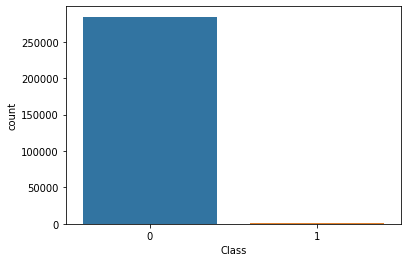

In [ ]:
# our data is highly unbalanced that has just .17% of positive target values
import seaborn as sns
sns.countplot(data['Class'])

In [ ]:
#finding null values
data.isnull().sum()
#our data has no null values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

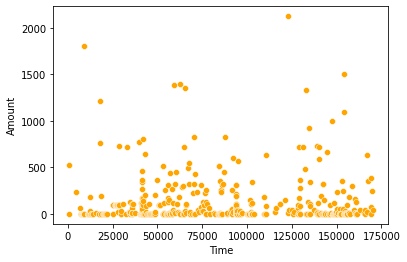

In [ ]:
# Now we will see how fraud and normal transactions are distributed over time and how amount is distributed in each type of transactions
data_fraud=data[data['Class']==1]
data_general=data[data['Class']==0]
#now we will see how the amount of transaction changing with type in both type of transactions
sns.scatterplot(data=data_fraud,x="Time",y="Amount",color="orange")
#both types of transactions does not show any relationship with amount
#though amount in fraud transaction seems very scattered as compared to genuine but less observations can be a factor in such patters

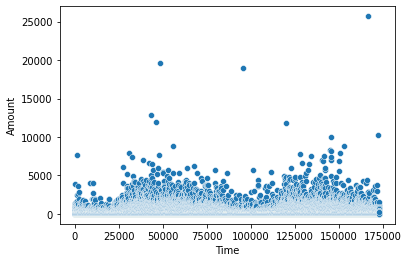

In [ ]:
sns.scatterplot(data=data_general,x="Time",y="Amount")

In [ ]:
data_fraud["Amount"].corr(data_fraud["Time"])

0.048731876460612104

In [ ]:
data_general["Amount"].corr(data_general["Time"])
#so we see for any type of transaction amount is not related to time

-0.010633753673009977

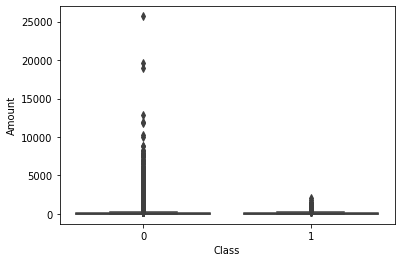

In [ ]:
sns.boxplot(x="Class",y="Amount",data=data)
# we see that genuine transactions are having extreme outliers

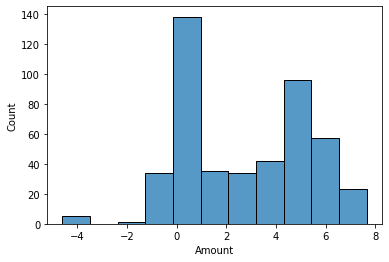

In [ ]:
sns.histplot(data=data_fraud, x=np.log(data_fraud['Amount']))

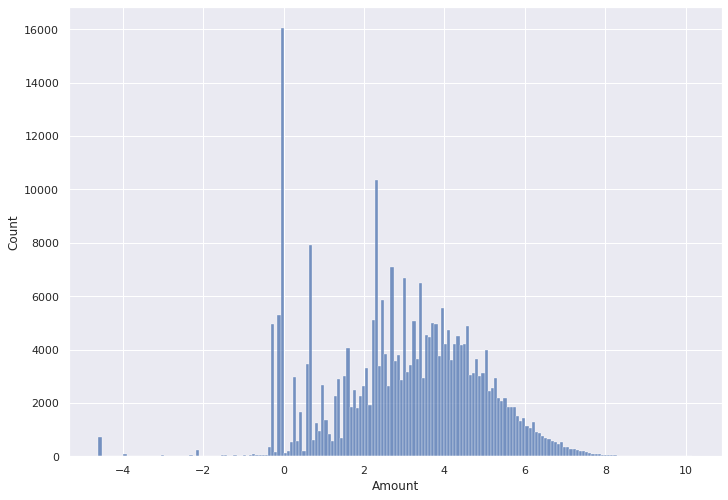

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=data_fraud, x=np.log(data_general["Amount"]))

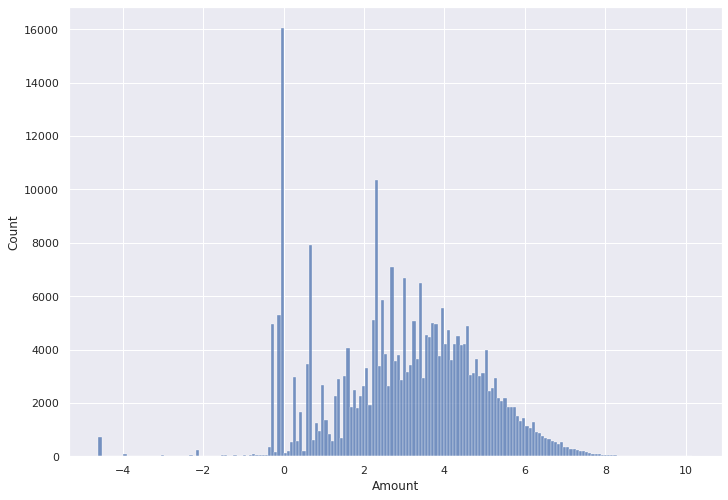

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=data_general, x=np.log(data_general["Amount"]))

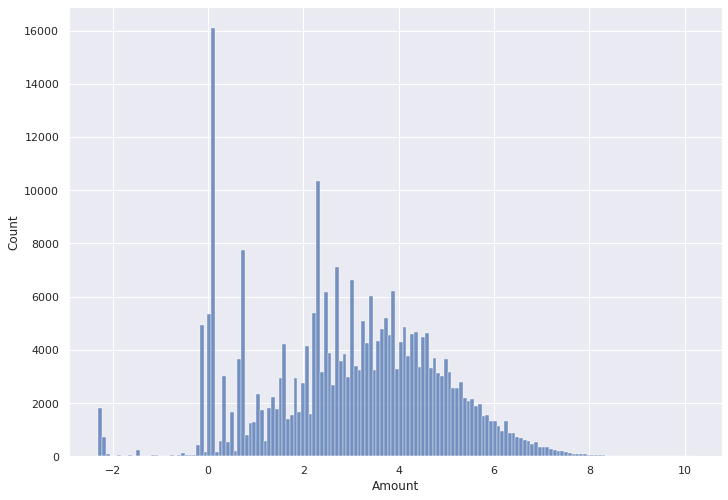

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=data, x=np.log(data["Amount"]+.1))

In [ ]:
# as we see log of amount is almost normally distributed with some outliers so we will make new column of log amount 
data["LAmount"]=np.log(data["Amount"]+.1)

In [ ]:
data.dropna()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,LAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,5.008767
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1.026042
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,5.936903
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,4.817051
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,4.249780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,-0.139262
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,3.214466
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,4.219214
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,2.312535


In [ ]:
# we can conduct as t-test to examine if the average amount of money is statistically different in two types of transactions
from scipy.stats import ttest_ind
ttest_ind(data[data["Class"] == 1]["LAmount"],data[data["Class"] == 0]["LAmount"])
# there is no statisticall difference in mean log amount of transactions even thoogh genuine is having more outliers

Ttest_indResult(statistic=-6.646379135631427, pvalue=3.009289376889132e-11)

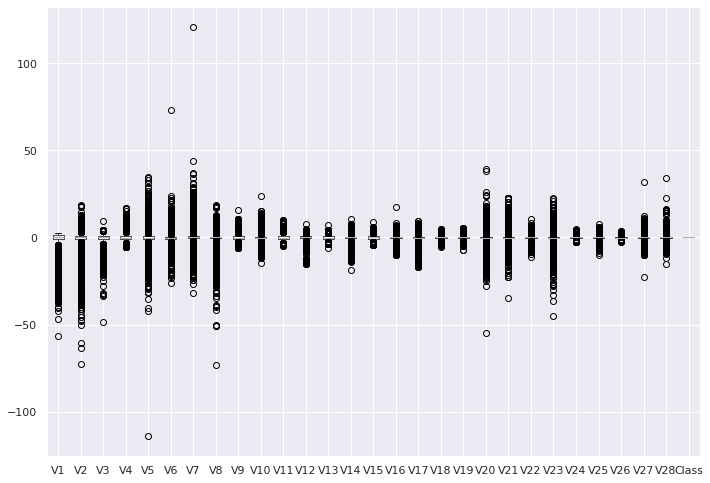

In [ ]:
data_general.drop(columns=["Time","Amount"],axis=1).boxplot()

In [ ]:
# As our data is imbalanced so we are eliminating extreme outlier in majority class without infuencing minority class observation
data_trimmed=data[data["Amount"]<5000]

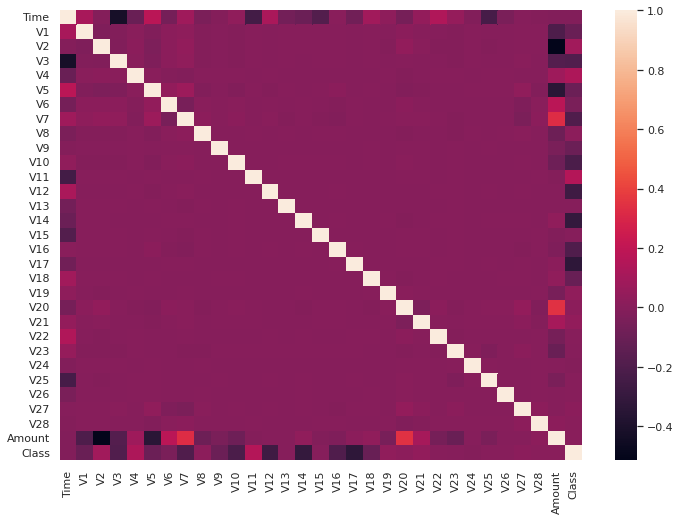

In [ ]:
# now we will see the correlation among various features
corr=data_trimmed.corr()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)
# we do not see any high correlation between features

In [ ]:
# we can not drop any column based on correlation
Y=data_trimmed.Class
X=data_trimmed.drop(columns=["Class"],axis=1)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.2,stratify=Y,random_state=1)

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

In [ ]:
from xgboost import XGBClassifier
from mlxtend.feature_selection import SequentialFeatureSelector
xg=XGBClassifier()

As my unsupervised statististical filter methods like correlation and variance not giving set of features to be eliminated.
I will use wrapper method with xgboost estimator to find best no of features and best feature for modelling as my data is heavily imbalanced.

In [ ]:
# to avoid overfitting so i will use xgboost for feature selection
model=SequentialFeatureSelector(xg, k_features="best",forward=True, floating=False, verbose=2,scoring='f1',cv=0)
model.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  4.1min finished

[2023-02-01 15:32:20] Features: 1/30 -- score: 0.7321178120617111[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:  5.3min finished

[2023-02-01 15:37:40] Features: 2/30 -- score: 0.8071135430916553[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:  6.2min finished

[2023-02-01 15:43:50] Features: 3/30 -- score: 0.8454172366621068[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

SequentialFeatureSelector(cv=0, estimator=XGBClassifier(), k_features='best',
                          scoring='f1', verbose=2)

In [ ]:
# After trading features and I will select 11 to 13 features for model training
model=SequentialFeatureSelector(xg, k_features=11,forward=True, floating=False, verbose=2,scoring='f1',cv=0)
model.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  4.0min finished

[2023-02-01 19:47:04] Features: 1/11 -- score: 0.7321178120617111[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:  5.2min finished

[2023-02-01 19:52:14] Features: 2/11 -- score: 0.8071135430916553[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:  5.9min finished

[2023-02-01 19:58:05] Features: 3/11 -- score: 0.8454172366621068[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

SequentialFeatureSelector(cv=0, estimator=XGBClassifier(), k_features=11,
                          scoring='f1', verbose=2)

In [ ]:
print('Best subset (corresponding names):', model.k_feature_names_) 

In [ ]:
# best 11 features from the model ('V3', 'V5', 'V6', 'V10', 'V12', 'V13', 'V14', 'V15', 'V17', 'V26', 'V28'
x_train=x_train[['V3', 'V5', 'V6', 'V10', 'V12', 'V13', 'V14', 'V15', 'V17', 'V26', 'V28']]

As i want to apply SVM and xgboost. For svm support vector margins we need need regularized features. I will  minmax scaler for this

In [ ]:
from sklearn.preprocessing import MinMaxScaler
for col in x_train.columns:
  scaler=MinMaxScaler()
  scaler.fit(x_train[[col]])
  x_train[col]=scaler.transform(x_train[[col]])



In [ ]:
from collections import Counter
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [ ]:
x_train.head()

,V3,V5,V6,V10,V12,V13,V14,V15,V17,V26,V28
196497,0.813852,0.424969,0.619995,0.499118,0.737982,0.589706,0.629982,0.416906,0.696700,0.287234,0.252684
275270,0.768366,0.416700,0.580096,0.491668,0.715260,0.593463,0.657217,0.517548,0.741509,0.266614,0.260950
58791,0.802289,0.441784,0.617882,0.513294,0.715496,0.553039,0.659658,0.507851,0.717208,0.354428,0.259176
3690,0.790283,0.414503,0.628934,0.523502,0.705755,0.650935,0.632661,0.502837,0.720367,0.402228,0.257123
110546,0.790834,0.387251,0.606246,0.523707,0.704521,0.557966,0.683923,0.598340,0.764167,0.384114,0.257963


In [ ]:
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [ ]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
xg=XGBClassifier()
sv = SVC(gamma='scale',class_weight={0:1,1:10})
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(xg, x_train, y_train, scoring='f1', cv=cv, n_jobs=-1)
scores1 = cross_val_score(sv, x_train, y_train, scoring='f1', cv=cv, n_jobs=-1)
score = np.mean(scores)
score1=np.mean(scores1)
print(score)
print(score1)


0.8312156884862728
0.793999691103743


In [ ]:
from sklearn.model_selection import GridSearchCV
sv=SVC()
parameter_grid={ 'class_weight':[{0:1,1:100}, {0:1,1:50}, {0:1,1:20}, {0:1,1:10}, {0:1,1:1}],'C':[.1,1,10,100,1000],'gamma':[.001,.01,.1,10,100]}
grid=GridSearchCV(sv,parameter_grid,cv=3,verbose=5,n_jobs=1,scoring='f1')
grid.fit(x_train,y_train)

Fitting 3 folds for each of 125 candidates, totalling 375 fits
[CV 1/3] END C=0.1, class_weight={0: 1, 1: 100}, gamma=0.001;, score=0.467 total time= 6.5min
[CV 2/3] END C=0.1, class_weight={0: 1, 1: 100}, gamma=0.001;, score=0.395 total time= 7.9min
[CV 3/3] END C=0.1, class_weight={0: 1, 1: 100}, gamma=0.001;, score=0.513 total time= 7.8min
[CV 1/3] END C=0.1, class_weight={0: 1, 1: 100}, gamma=0.01;, score=0.819 total time= 8.3min
[CV 2/3] END C=0.1, class_weight={0: 1, 1: 100}, gamma=0.01;, score=0.780 total time= 8.0min
[CV 3/3] END C=0.1, class_weight={0: 1, 1: 100}, gamma=0.01;, score=0.821 total time= 3.3min
[CV 1/3] END C=0.1, class_weight={0: 1, 1: 100}, gamma=0.1;, score=0.789 total time= 5.2min
[CV 2/3] END C=0.1, class_weight={0: 1, 1: 100}, gamma=0.1;, score=0.776 total time= 3.9min
[CV 3/3] END C=0.1, class_weight={0: 1, 1: 100}, gamma=0.1;, score=0.816 total time= 5.7min
[CV 1/3] END C=0.1, class_weight={0: 1, 1: 100}, gamma=10;, score=0.685 total time= 4.3min
[CV 2/3] 

GridSearchCV(cv=3, estimator=SVC(), n_jobs=1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'class_weight': [{0: 1, 1: 100}, {0: 1, 1: 50},
                                          {0: 1, 1: 20}, {0: 1, 1: 10},
                                          {0: 1, 1: 1}],
                         'gamma': [0.001, 0.01, 0.1, 10, 100]},
             scoring='f1', verbose=5)

In [ ]:
print(grid.best_score_)
print(grid.best_estimator_)
#0.8307250058457862
#SVC(C=1, class_weight={0: 1, 1: 1}, gamma=10)

0.8307250058457862
SVC(C=1, class_weight={0: 1, 1: 1}, gamma=10)


In [ ]:
from sklearn.model_selection import GridSearchCV
xg=XGBClassifier()
parameter_grid={ 'eta':[.001,.01,0.1,1,10],'n_estimator':[100,300,500,700,900],'max_depth':[2,5,6,7]}
grid=GridSearchCV(xg,parameter_grid,cv=3,verbose=5,n_jobs=1,scoring='f1')
grid.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3] END eta=0.001, max_depth=2, n_estimator=100;, score=0.790 total time=   8.8s
[CV 2/3] END eta=0.001, max_depth=2, n_estimator=100;, score=0.788 total time=   8.6s
[CV 3/3] END eta=0.001, max_depth=2, n_estimator=100;, score=0.826 total time=   8.7s
[CV 1/3] END eta=0.001, max_depth=2, n_estimator=300;, score=0.790 total time=   8.7s
[CV 2/3] END eta=0.001, max_depth=2, n_estimator=300;, score=0.788 total time=   8.7s
[CV 3/3] END eta=0.001, max_depth=2, n_estimator=300;, score=0.826 total time=   8.7s
[CV 1/3] END eta=0.001, max_depth=2, n_estimator=500;, score=0.790 total time=   8.7s
[CV 2/3] END eta=0.001, max_depth=2, n_estimator=500;, score=0.788 total time=   8.6s
[CV 3/3] END eta=0.001, max_depth=2, n_estimator=500;, score=0.826 total time=   8.7s
[CV 1/3] END eta=0.001, max_depth=2, n_estimator=700;, score=0.790 total time=   8.7s
[CV 2/3] END eta=0.001, max_depth=2, n_estimator=700;, score=0.788 total time

GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=1,
             param_grid={'eta': [0.001, 0.01, 0.1, 1, 10],
                         'max_depth': [2, 5, 6, 7],
                         'n_estimator': [100, 300, 500, 700, 900]},
             scoring='f1', verbose=5)

In [ ]:
print(grid.best_score_)
print(grid.best_estimator_)

0.8509660319453163
XGBClassifier(eta=0.001, max_depth=5, n_estimator=100)
0.8509660319453163
XGBClassifier(eta=0.001, max_depth=5, n_estimator=100)


In [ ]:
x_test=x_test[['V3', 'V5', 'V6', 'V10', 'V12', 'V13', 'V14', 'V15', 'V17', 'V26', 'V28']]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
level0=list()
level0.append(('sv',SVC(C=1, class_weight={0: 1, 1: 1}, gamma=10)))
level0.append(('xg',XGBClassifier(eta=0.001, max_depth=5, n_estimator=100)))
level1 = LogisticRegression()
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
model.fit(x_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('sv',
                                SVC(C=1, class_weight={0: 1, 1: 1}, gamma=10)),
                               ('xg',
                                XGBClassifier(eta=0.001, max_depth=5,
                                              n_estimator=100))],
                   final_estimator=LogisticRegression())

In [ ]:
from sklearn.preprocessing import MinMaxScaler
for col in x_test.columns:
  scaler=MinMaxScaler()
  scaler.fit(x_test[[col]])
  x_test[col]=scaler.transform(x_test[[col]])

In [ ]:
from sklearn.metrics import f1_score
hat=model.predict(x_train)

In [ ]:
print(f1_score(y_train,hat))

0.8751753155680225
